<a href="https://colab.research.google.com/github/leopapuma/tarea-3-de-ecuaciones-diferenciales-parciales/blob/main/tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

h = 0.1, k = 0.0005, r = 0.0500
h = 0.1, k = 0.01, r = 1.0000

 Resultados para k = 0.0005 



,x,u_num (k=0.0005),u_exacta,Error abs
0,0.0,0.000000,0.000000e+00,0.000000e+00
1,0.1,0.002287,2.222414e-03,6.410661e-05
2,0.2,0.004349,4.227283e-03,1.219380e-04
3,0.3,0.005986,5.818356e-03,1.678333e-04
4,0.4,0.007037,6.839888e-03,1.972999e-04
5,0.5,0.007399,7.191883e-03,2.074533e-04
6,0.6,0.007037,6.839888e-03,1.972999e-04
7,0.7,0.005986,5.818356e-03,1.678333e-04
8,0.8,0.004349,4.227283e-03,1.219380e-04
9,0.9,0.002287,2.222414e-03,6.410661e-05



 Resultados para k = 0.01 



,x,u_num (k=0.01),u_exacta,Error abs
0,0.0,0.000000,0.000000e+00,0.000000e+00
1,0.1,-30266.270026,2.222414e-03,3.026627e+04
2,0.2,60588.054981,4.227283e-03,6.058805e+04
3,0.3,-89862.842345,5.818356e-03,8.986285e+04
4,0.4,115225.537917,6.839888e-03,1.152255e+05
5,0.5,-132328.392814,7.191883e-03,1.323284e+05
6,0.6,136478.815915,6.839888e-03,1.364788e+05
7,0.7,-124251.368517,5.818356e-03,1.242514e+05
8,0.8,94976.581153,4.227283e-03,9.497658e+04
9,0.9,-51519.548023,2.222414e-03,5.151955e+04


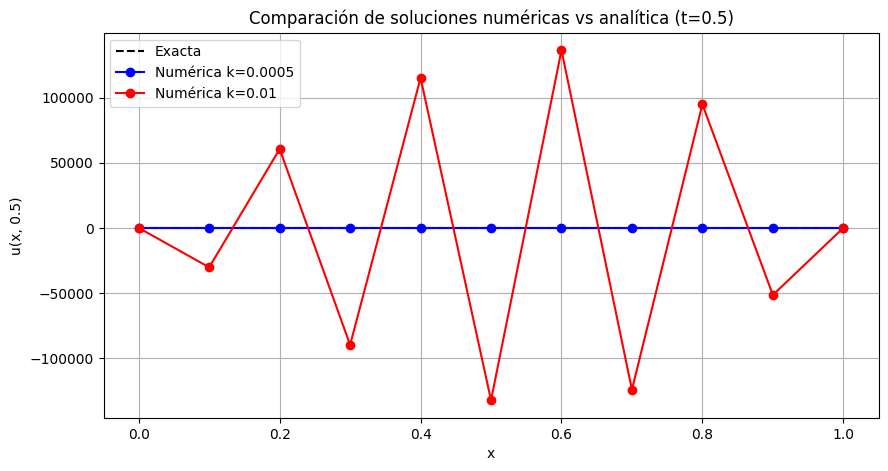

Comentario: como el metodo explicito depende del parametro r=k/h^2,para que pueda existir una estabilidad
r debe esrar <= 0.5 , en este caso tenemos que h=0.01 y k=0.0005 entonces r=0.0005 entonces r=0.05 es estable pero
con h=0.1 y k=0.01 entonecs r=1.0 entoces es inestable, entoces el segundo caso cuando k=0.01 genere errores grandes
y con esto no se cumple con el criterio de estabilidad de Von Neumann


In [2]:
# usuamos las siguientes librerias para resolver el ejercicio en clase

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#creamos 2 funciones una contendra la solucion exacta y la otra el metodo de difrencias

def solucion_exacto(x, t):
    """Solución analítica exacta"""
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

def metodo_explicito(h, k, t_final=0.5):

    x = np.arange(0, 1 + h, h)
    N = len(x)
    r = k / h**2  # número de Fourier

    print(f"h = {h}, k = {k}, r = {r:.4f}") # imprimimos

 #construimos la condicion inicial
    u = np.sin(np.pi * x)  # condición inicial
    u[0] = 0
    u[-1] = 0

    pasos_tiempo = int(t_final / k)
    # construimos 2 for para resolver el problema
    for n in range(pasos_tiempo):
        u_new = np.copy(u)
        for i in range(1, N-1):
            u_new[i] = u[i] + r * (u[i+1] - 2*u[i] + u[i-1])
        u = np.copy(u_new)

    return x, u

#escribimos los valroes de las variables que nos dan como dato en el ejercicio
h1 = 0.1
k1 = 0.0005
x1, u_num1 = metodo_explicito(h1, k1)
u_exact1 = solucion_exacto(x1, 0.5)
h2 = 0.1
k2 = 0.01
x2, u_num2 = metodo_explicito(h2, k2)
u_exact2 = solucion_exacto(x2, 0.5)
#construimos la tabla  cuando k vale 0.0005
tabla1 = pd.DataFrame({
    'x': x1,
    'u_num (k=0.0005)': u_num1,
    'u_exacta': u_exact1,
    'Error abs': np.abs(u_num1 - u_exact1)
})
# ahora construimos la tabla cuando k vale 0.01
tabla2 = pd.DataFrame({
    'x': x2,
    'u_num (k=0.01)': u_num2,
    'u_exacta': u_exact2,
    'Error abs': np.abs(u_num2 - u_exact2)
})
# construimos el print para ver los resultados de las 2 tablas
print("\n Resultados para k = 0.0005 \n")
display(tabla1)

print("\n Resultados para k = 0.01 \n")
display(tabla2)

#igual nos piden hacer una comparacion grafica entonces construimos la grafica, para poder observad el resultado analitico y exacto:
plt.figure(figsize=(10,5))
plt.plot(x1, u_exact1, 'k--', label='Exacta')
plt.plot(x1, u_num1, 'bo-', label='Numérica k=0.0005')
plt.plot(x2, u_num2, 'ro-', label='Numérica k=0.01')
plt.title('Comparación de soluciones numéricas vs analítica (t=0.5)')
plt.xlabel('x')
plt.ylabel('u(x, 0.5)')
plt.legend()
plt.grid(True)
plt.show()
 # nota en la tabla se puede observar el resultado exacto  como el numerico
print("""Comentario: como el metodo explicito depende del parametro r=k/h^2,para que pueda existir una estabilidad
r debe esrar <= 0.5 , en este caso tenemos que h=0.01 y k=0.0005 entonces r=0.0005 entonces r=0.05 es estable pero
con h=0.1 y k=0.01 entonecs r=1.0 entoces es inestable, entoces el segundo caso cuando k=0.01 genere errores grandes
y con esto no se cumple con el criterio de estabilidad de Von Neumann""")
